In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns#Understanding my variables


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/itk-2020/x_test.csv
/kaggle/input/itk-2020/y_train.csv
/kaggle/input/itk-2020/x_train.csv
/kaggle/input/itk-2020/y_test_baseline.csv


In [2]:
forestCover = pd.read_csv("/kaggle/input/itk-2020/x_train.csv")
forestCoverY = pd.read_csv("/kaggle/input/itk-2020/y_train.csv")

Check columns

In [3]:
print(forestCoverY.columns)
print(forestCover.columns)
print(len(forestCover.columns))

Index(['id', 'Cover_Type'], dtype='object')
Index(['id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3',
       'Wilderness_Area_4', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
       'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19',
       'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23',
       'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27',
       'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31',
       'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_

In [4]:
pd.set_option('display.max_columns', 100)

Add the cover type variable to the features (for ease of programming later)

In [5]:
forestCover["Cover_Type"] =  forestCoverY["Cover_Type"]

In [6]:
forestCover.columns

Index(['id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3',
       'Wilderness_Area_4', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
       'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19',
       'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23',
       'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27',
       'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31',
       'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35',
       'Soil_Type_36', 'Soil_Type_

Check info and describe

In [7]:
print(forestCover.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406708 entries, 0 to 406707
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   id                                  406708 non-null  int64
 1   Elevation                           406708 non-null  int64
 2   Aspect                              406708 non-null  int64
 3   Slope                               406708 non-null  int64
 4   Horizontal_Distance_To_Hydrology    406708 non-null  int64
 5   Vertical_Distance_To_Hydrology      406708 non-null  int64
 6   Horizontal_Distance_To_Roadways     406708 non-null  int64
 7   Hillshade_9am                       406708 non-null  int64
 8   Hillshade_Noon                      406708 non-null  int64
 9   Hillshade_3pm                       406708 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  406708 non-null  int64
 11  Wilderness_Area_1                   406708 non-null 

In [8]:
print(forestCover.describe())

                  id      Elevation         Aspect          Slope  \
count  406708.000000  406708.000000  406708.000000  406708.000000   
mean   203353.500000    2959.329730     155.763309      14.103413   
std    117406.630977     280.028028     111.925462       7.490411   
min         0.000000    1859.000000       0.000000       0.000000   
25%    101676.750000    2809.000000      58.000000       9.000000   
50%    203353.500000    2995.000000     127.000000      13.000000   
75%    305030.250000    3163.000000     261.000000      18.000000   
max    406707.000000    3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     406708.000000                   406708.000000   
mean                         269.485181                       46.467994   
std                          212.462577                       58.327213   
min                            0.000000                     -173.000000   
25%

Check head and tail

In [9]:
forestCover.head()

,id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,0,3342,15,13,350,55,2118,208,212,139,1486,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1,2764,39,13,175,43,2648,220,210,122,366,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,2,2773,158,5,162,14,2012,226,241,149,967,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,3,3083,108,16,30,-14,2639,246,220,98,1909,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,4,3096,40,4,201,38,4592,220,231,147,2432,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [10]:
forestCover.tail()

,id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
406703,406703,3066,133,10,170,30,1455,237,235,128,2624,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
406704,406704,2308,37,31,162,38,616,202,156,71,895,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
406705,406705,2715,73,32,342,188,1027,237,162,31,953,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
406706,406706,3020,179,13,170,19,1471,225,247,152,450,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
406707,406707,3368,191,5,162,2,2639,220,244,160,547,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7


![](http://)checking the data on **Excel**, its seems that the soil_type columns and Wilderness_area_columns are one-hot-encoded colums of 40 different types of soil types We would be undoing the one-hot-encoding

## Check null values

In [11]:
forestCover.apply(lambda x: sum(x.isnull()),axis=0)

id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


No null values

## getting categorical from one hot encoding

In [12]:
soilTypesDf =  forestCover[['Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
       'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19',
       'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23',
       'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27',
       'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31',
       'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35',
       'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39',
       'Soil_Type_40']]
forestCover['Soil_Types'] = soilTypesDf.idxmax(1)


WildernessAreasDF = forestCover[['Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3',
       'Wilderness_Area_4']]

forestCover['Wilderness_Areas'] = WildernessAreasDF.idxmax(1)

### Dataframe without one hot encoded values

In [13]:
CoverDf = forestCover[['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points','Cover_Type', 'Soil_Types', 
                      'Wilderness_Areas']]

## Search for outliers

Outlier detection using 3xIQR

In [14]:
def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [15]:
for column in forestCover[['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']]:
    if outlier_function(forestCover, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(forestCover, column)[2], column))

There are 189 outliers in Slope
There are 199 outliers in Horizontal_Distance_To_Hydrology
There are 3729 outliers in Vertical_Distance_To_Hydrology
There are 727 outliers in Hillshade_9am
There are 835 outliers in Hillshade_Noon
There are 7 outliers in Horizontal_Distance_To_Fire_Points


The hillshade_9am and noon all had values between 0 and 250, going to keep that. In fact I wont remove any outlier, as there might be outliers in the test data as well

## Plot categorical datas

plot cover types/labels

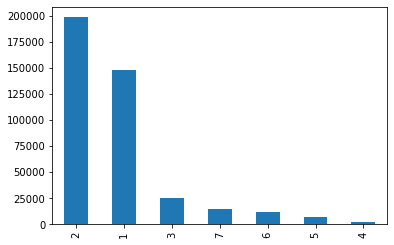

In [16]:
CoverDf['Cover_Type'].value_counts().plot(kind='bar')

Huge discrepancy between the 2 and 1 as well as (3, 7, 6,5,4). It shows that those are fewer cover types, and I should probably sample them more. I would observe accuracies going forward and see if this affects results

In [17]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 6

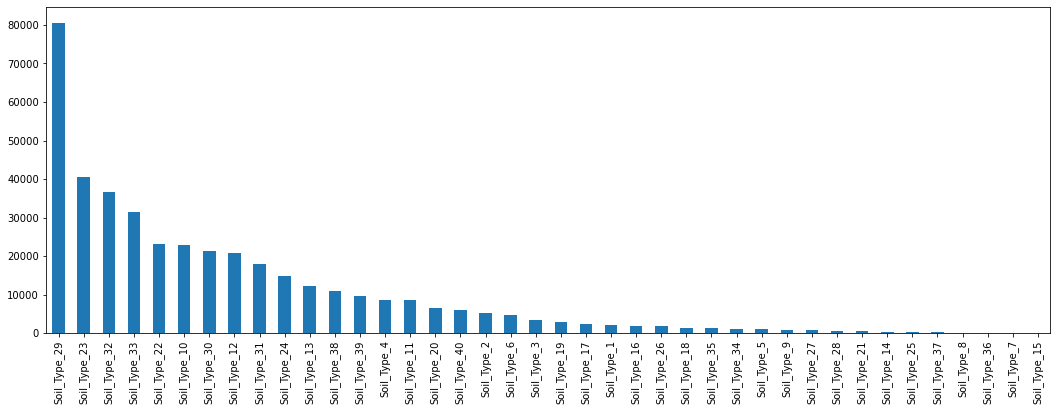

In [18]:
CoverDf['Soil_Types'].value_counts().plot(kind='bar')

A lot of soil 29, 23, 32 and others shown. It might be interesting to see if there are correlations between soit types and solutions

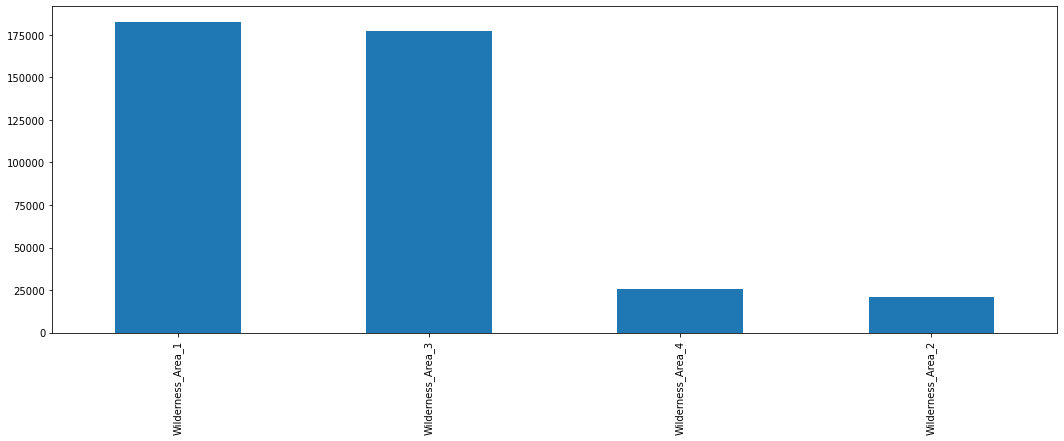

In [19]:
 CoverDf['Wilderness_Areas'].value_counts().plot(kind='bar') 

## Bivariate analysis and continous data analysis

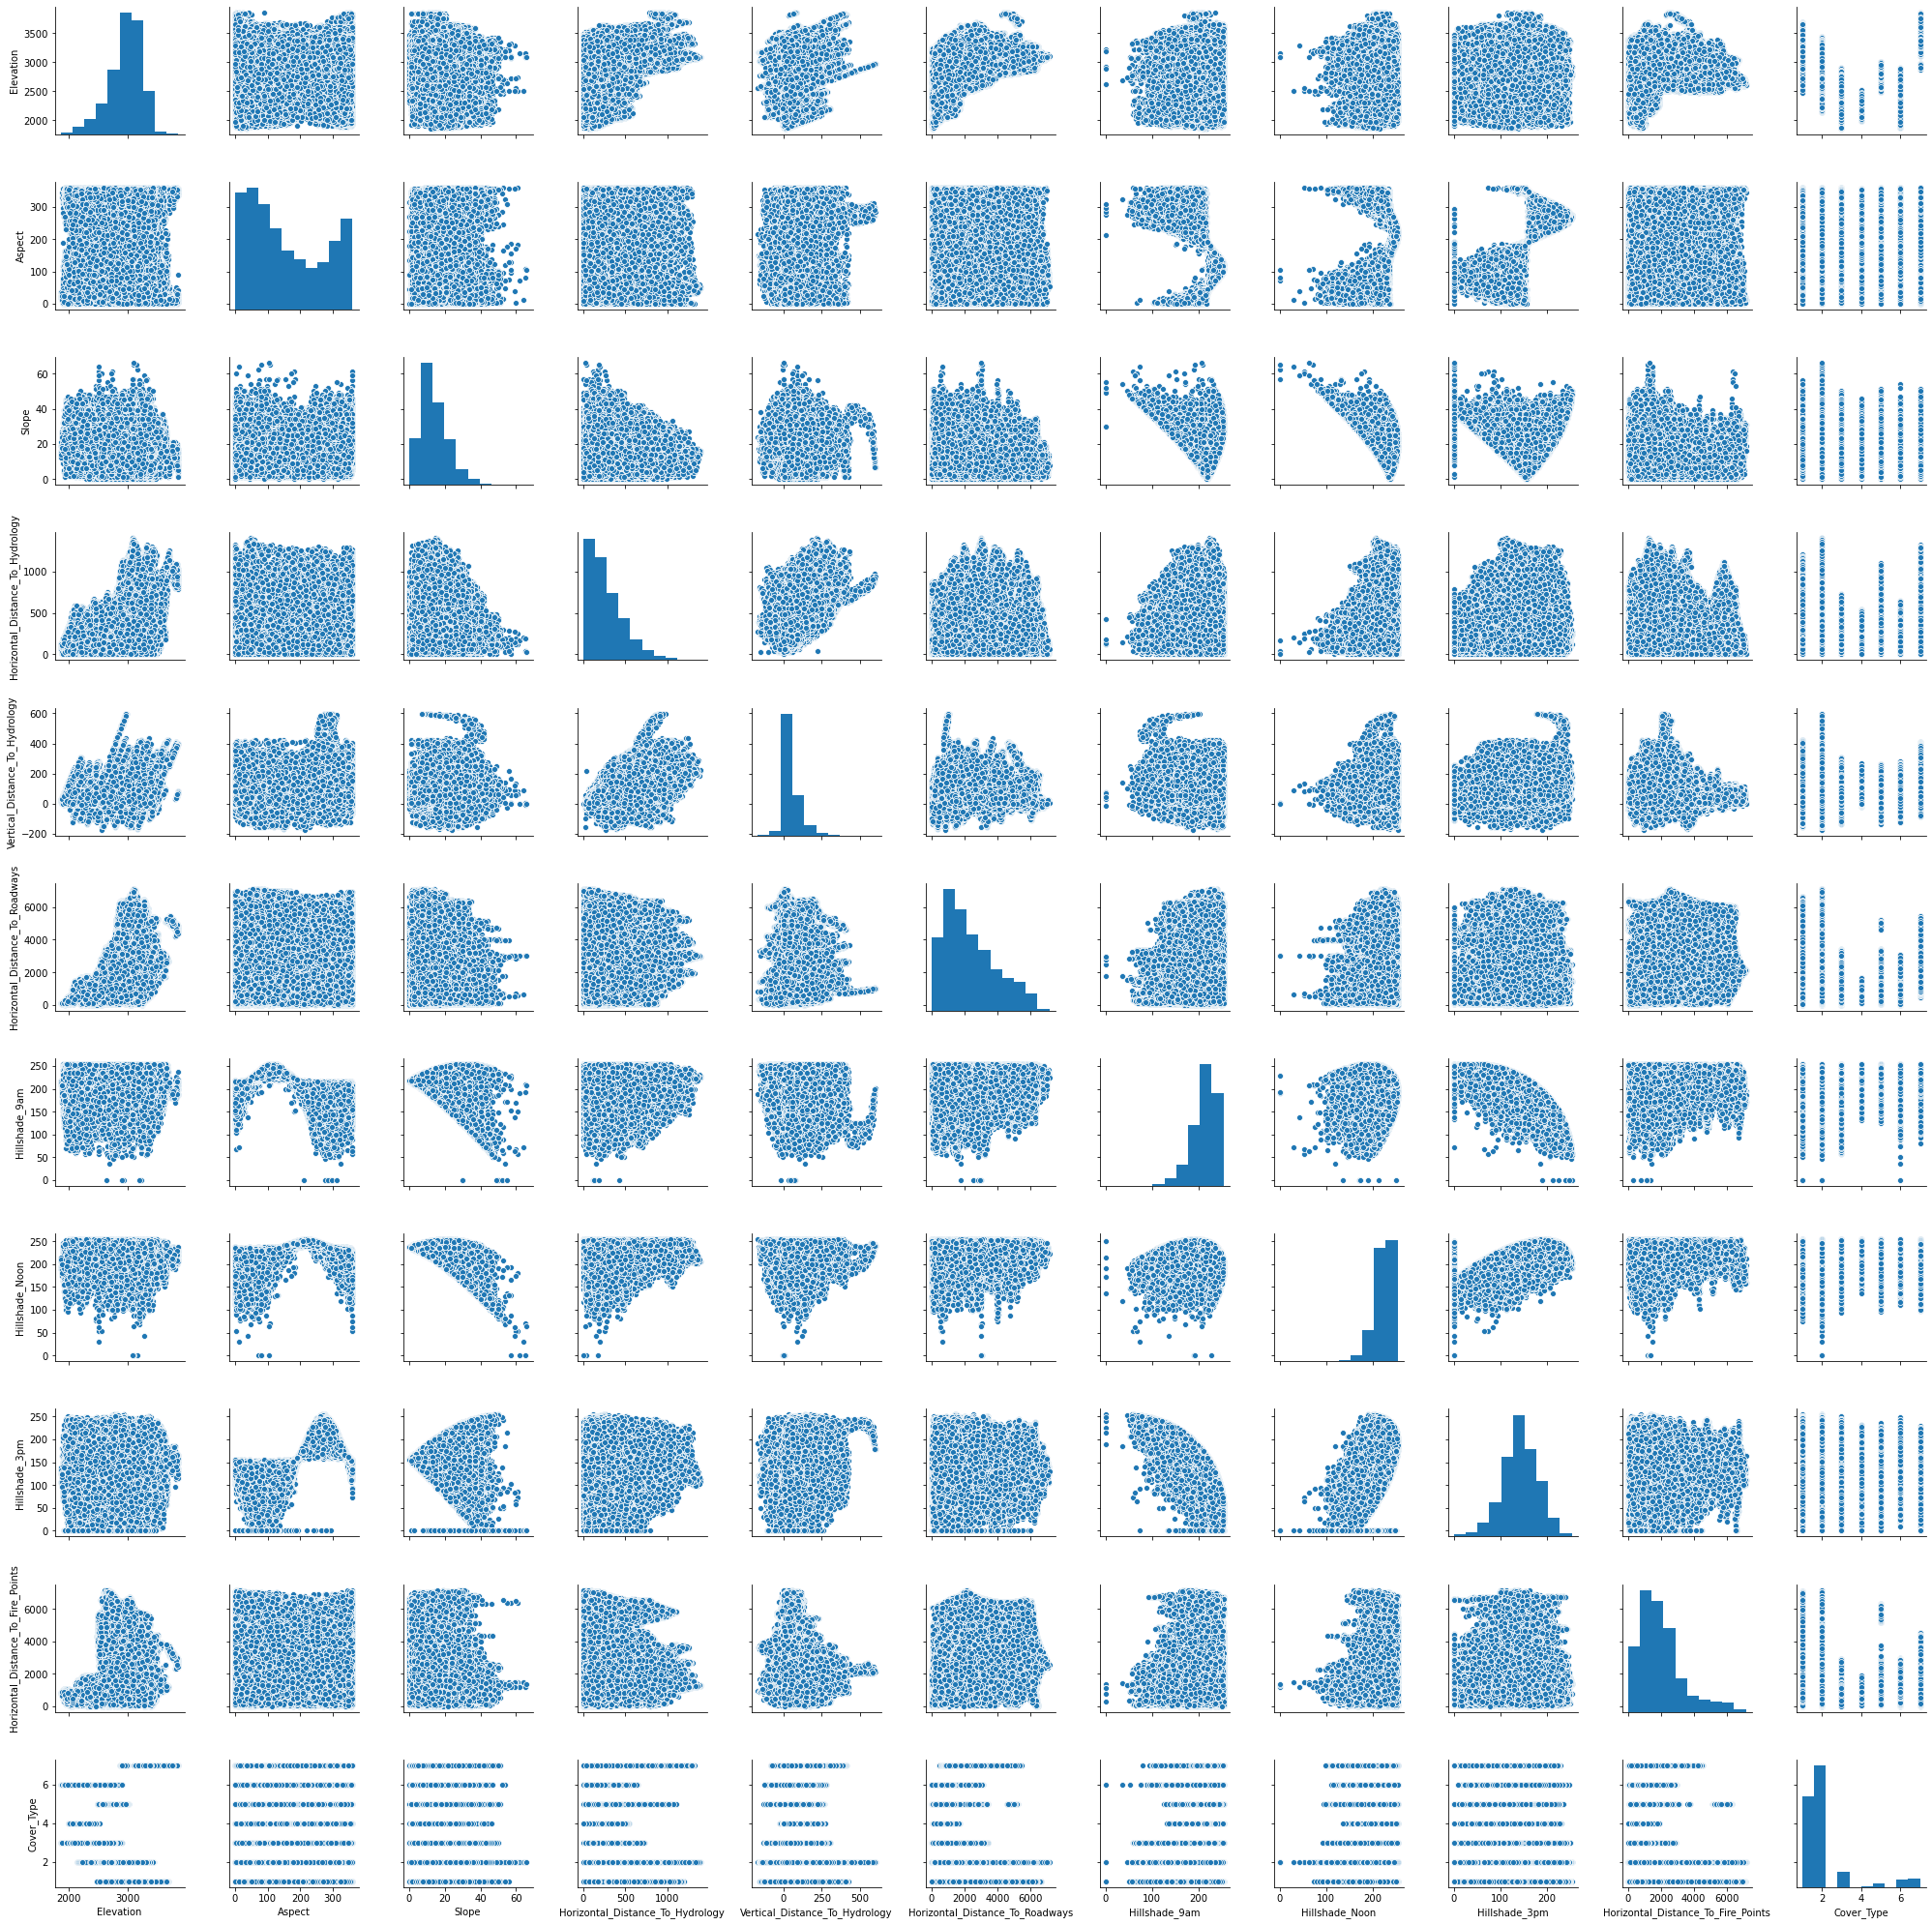

In [20]:
sns.pairplot(CoverDf)

Univariate data on the diagonal and bivariate in other places

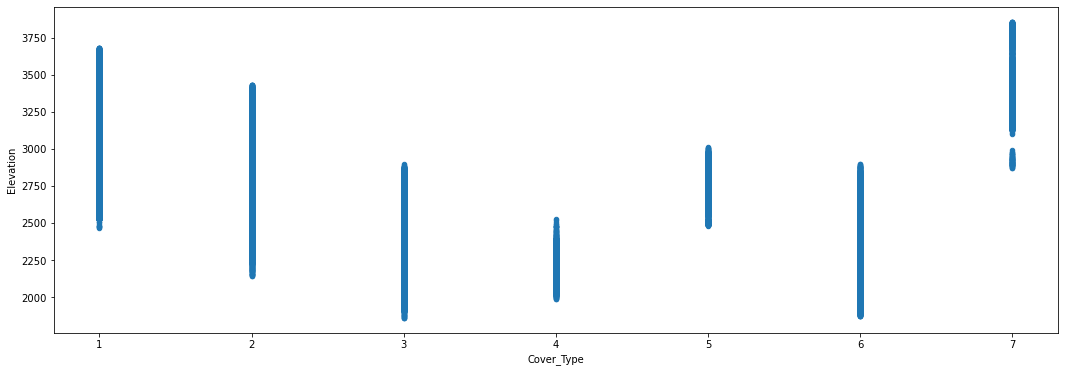

In [21]:
 CoverDf.plot.scatter(x='Cover_Type',
                      y='Elevation',)

Some patterns can be found in the hillshade features but nothing too significant I think. There is a pattern seen between elevation and 

## General Correlation

Text(0.5, 1.1, 'Pearson Correlation of All Features')

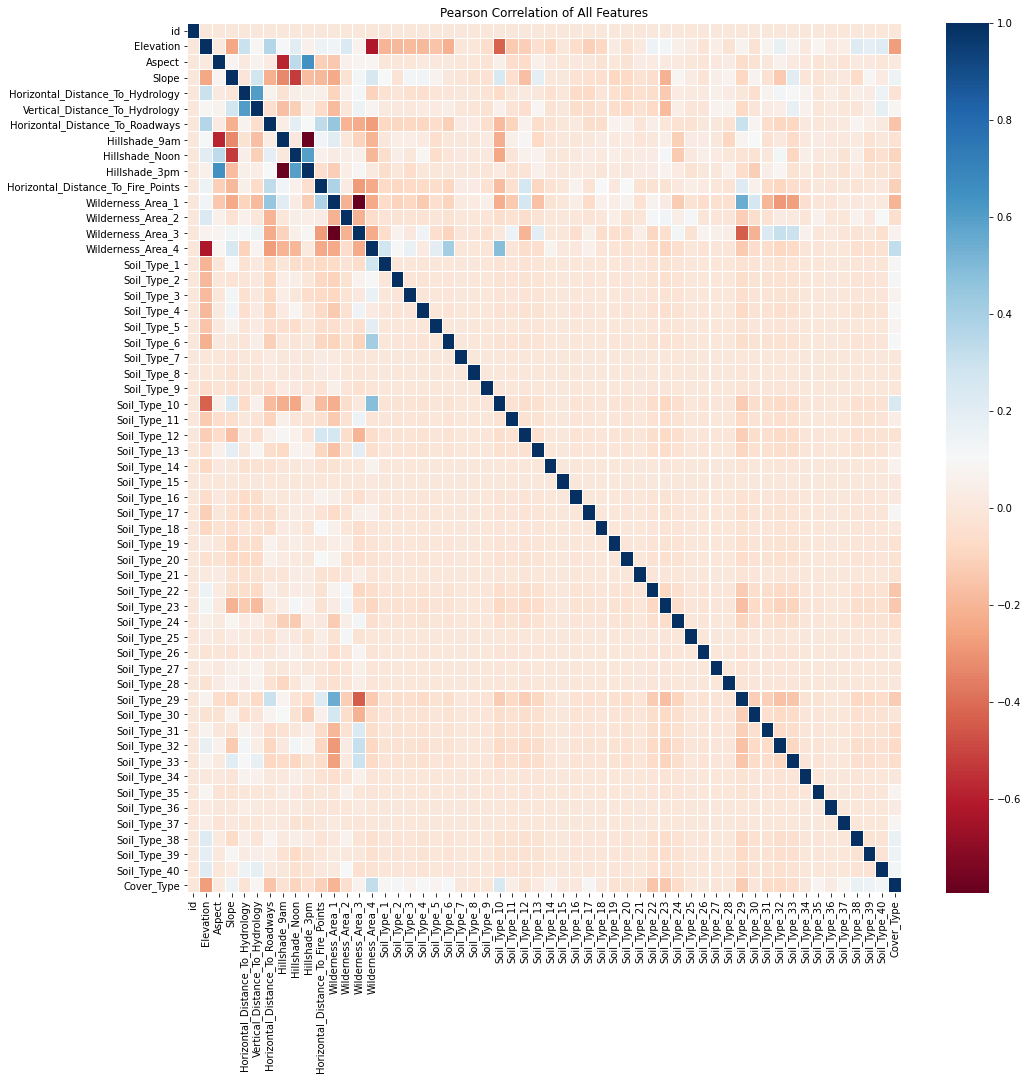

In [22]:
plt.figure(figsize=(16,16))

colormap = plt.cm.RdBu
sns.heatmap(forestCover.corr(),linewidths=0.1,vmax=1.0, 
            square=False, cmap=colormap, linecolor='white', annot=False)
plt.title('Pearson Correlation of All Features', y=1.10, size=12)

None of the data seems to be strongly correlated with the cover_type variable. 

If I am to add a new feature, I would add euclidean distance to hydrology. And If I were to remove features I would remove soil types. 